In [1]:
from funtions import *

# Data

In [2]:
census_df = pd.read_csv('../data/census.csv')
poi_df = pd.read_csv('../data/number_of_pois.csv')
movement_data_folder = '../data/movement_data/'

# Movement Probability

Probability distribution for in-degree or out-degree for a single week, i.e., the likelihood a random CT will have a given degree for that week.

In [3]:
# Parameters
naics_code = ''
week = 1
degree_type = 'In-Degree'

# Get distributions and bins
movements = load_movement_data(naics_code=naics_code, movement_data_folder=movement_data_folder)
degrees = movements[degree_type][week, :]
distributions, bins = np.histogram(degrees, bins=10, density=True)

print('\n'.join(f"Bin {i+1}: [{bins[i]:.2f}, {bins[i+1]:.2f}) - Density: {distributions[i]:.2e}" for i in range(len(distributions))))

Bin 1: [0.00, 3423.40) - Density: 2.33e-04
Bin 2: [3423.40, 6846.80) - Density: 3.16e-05
Bin 3: [6846.80, 10270.20) - Density: 1.23e-05
Bin 4: [10270.20, 13693.60) - Density: 7.43e-06
Bin 5: [13693.60, 17117.00) - Density: 3.72e-06
Bin 6: [17117.00, 20540.40) - Density: 2.60e-06
Bin 7: [20540.40, 23963.80) - Density: 7.43e-07
Bin 8: [23963.80, 27387.20) - Density: 7.43e-07
Bin 9: [27387.20, 30810.60) - Density: 0.00e+00
Bin 10: [30810.60, 34234.00) - Density: 3.72e-07


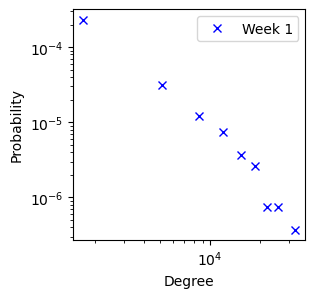

In [4]:
# Plot
fix, ax = plt.subplots(1,1, figsize=(3,3))
plot_scatter_probability(distributions, bins, ax=ax, color='b', alpha=1, label='Week 1')
ax.legend()

# Pearson correlation coefficients

Pearson correlation coefficients for two features, to measure correlations.

In [5]:
# Parameters
naics_code = ''
week_start = 1
week_stop = 6
anomalous_week = 7
omit_tracts = ['980000']

# Set up dataframe
movements = load_movement_data(movement_data_folder=movement_data_folder, naics_code=naics_code)
degrees = get_degrees(week_start=week_start, week_stop=week_stop, anomalous_week=anomalous_week, movements=movements)
df = merge_dfs(degrees, census_df, poi_df, omit_tracts=omit_tracts)

print('Available Features:\n', *df.columns[1:22], "...", sep="',\n'")

Available Features:
',
'Mean In-Degree',
'Mean Out-Degree',
'Anomalous In-Degree',
'Anomalous Out-Degree',
'Income',
'Population',
'Population Density',
'Unemployment (%)',
'Under 18 Population',
'Under 5 Population',
'Non-White (%)',
'School Enrollment',
'Non-Hispanic and Non-Black (%)',
'Highschool Graduate (%)',
'Poverty Rate (%)',
'Owner Occupied',
'Renter Occupied',
'Owner Occupied (%)',
'Renter Occupied (%)',
'Number of POIs (All POIs)',
'Number of POIs (61)',
'...


In [6]:
# Set features
feature1 = 'Population'
feature2 = 'Mean Out-Degree'

# Get Pearson values
x = df[feature1]
y = df[feature2]
r, p = stats.pearsonr(x, y)

print('r =', r, '\np =', p)

r = 0.8452495376170293 
p = 2.6865747069439295e-215


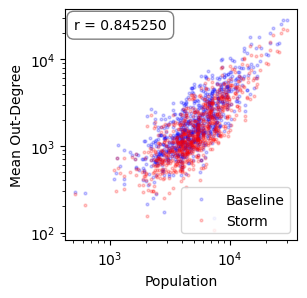

In [7]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_correlations(x, y, r=r, ax=ax, label='Baseline')
plot_correlations(x, df['Anomalous Out-Degree'], ax=ax, color='r', label='Storm')

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.legend(loc='lower right')

# Multivariate linear regression

Multivariate regression to determine impact features have on degree.

In [9]:
# Parameters
naics_code = ''
week_start = 1
week_stop = 6
anomalous_week = 7
omit_tracts = ['980000']

# Set up dataframe
movements = load_movement_data(movement_data_folder=movement_data_folder, naics_code=naics_code)
degrees = get_degrees(week_start=week_start, week_stop=week_stop, anomalous_week=anomalous_week, movements=movements)
df = merge_dfs(degrees, census_df, poi_df, omit_tracts=omit_tracts)

print('Available Features:\n', *df.columns[1:22], "...", sep="',\n'")

Available Features:
',
'Mean In-Degree',
'Mean Out-Degree',
'Anomalous In-Degree',
'Anomalous Out-Degree',
'Income',
'Population',
'Population Density',
'Unemployment (%)',
'Under 18 Population',
'Under 5 Population',
'Non-White (%)',
'School Enrollment',
'Non-Hispanic and Non-Black (%)',
'Highschool Graduate (%)',
'Poverty Rate (%)',
'Owner Occupied',
'Renter Occupied',
'Owner Occupied (%)',
'Renter Occupied (%)',
'Number of POIs (All POIs)',
'Number of POIs (61)',
'...


In [10]:
features = [
    'Income',
    'Population',
    'Population Density',
    'Number of POIs (All POIs)',
]

target = 'Mean In-Degree'
results = run_regression(df, features, target)
print(f'\nRegression for: {target} (Weeks {week_start+1} - {week_stop+1})\n',
    results.reindex(results['Value'].abs().sort_values(ascending=False).index))



Regression for: Mean In-Degree (Weeks 2 - 7)
                         Name        Value
3  Number of POIs (All POIs)  2022.648165
1                 Population   990.469765
2         Population Density  -384.703443
0                     Income   250.473653
4             R² (Model Fit)     0.520610


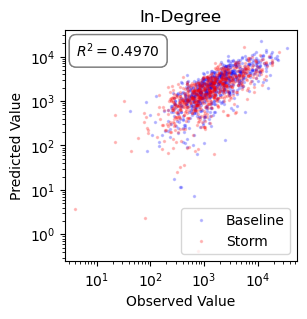

In [11]:
# Plot observed vs predicted values
fig, ax = plt.subplots(1,1, figsize=(3,3))

ax.set_title('In-Degree')
plot_observed_vs_predicted(df, features, 'Mean In-Degree', ax=ax, label='Baseline', color='b', alpha=.2)
plot_observed_vs_predicted(df, features, 'Anomalous In-Degree', ax=ax, label='Storm', color='r', alpha=.2)

ax.legend(loc='lower right')
